In [4]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import load_model

In [19]:
EPOCHS = 100
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = 'plantvillage'
width=256
height=256
depth=3

In [17]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [21]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for disease_folder in root_dir :
        plant_disease_image_list = listdir(f"{directory_root}/{disease_folder}")

        for image in plant_disease_image_list[:300]:
            image_directory = f"{directory_root}/{disease_folder}/{image}"
            if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                image_list.append(convert_image_to_array(image_directory))
                label_list.append(disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Image loading completed


In [22]:
image_size = len(image_list)
image_size

2999

In [23]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('tomato_label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [24]:
print(label_binarizer.classes_)

['Tomato___Bacterial_spot' 'Tomato___Early_blight' 'Tomato___Late_blight'
 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Tomato___Tomato_mosaic_virus'
 'Tomato___healthy']


In [25]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

In [26]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Spliting data to train, test


In [27]:
for i in x_train[0][0]:
    print(i)

[0.6313 0.6313 0.702 ]
[0.609 0.609 0.68 ]
[0.5957 0.5957 0.6665]
[0.6045 0.609  0.671 ]
[0.609  0.6133 0.676 ]
[0.609 0.609 0.662]
[0.6    0.6    0.6533]
[0.5957 0.6    0.6445]
[0.542  0.5376 0.582 ]
[0.48   0.4756 0.5156]
[0.569  0.569  0.5957]
[0.671  0.671  0.6978]
[0.6357 0.6265 0.6533]
[0.6    0.5957 0.6133]
[0.64   0.6357 0.6533]
[0.6577 0.6533 0.671 ]
[0.529 0.507 0.511]
[0.3823 0.36   0.3645]
[0.2267 0.2045 0.2089]
[0.1644 0.1422 0.1466]
[0.1644 0.1422 0.1466]
[0.1555 0.1333 0.1378]
[0.1333  0.1111  0.11554]
[0.12    0.0978  0.10223]
[0.12    0.0978  0.10223]
[0.12    0.0978  0.10223]
[0.12    0.0978  0.10223]
[0.11554 0.0933  0.0978 ]
[0.11554 0.0933  0.0978 ]
[0.1111  0.08887 0.0933 ]
[0.1111  0.08887 0.0933 ]
[0.1111  0.08887 0.0933 ]
[0.0933 0.0845 0.08  ]
[0.0933 0.0845 0.08  ]
[0.0933 0.0845 0.08  ]
[0.0978  0.08887 0.08887]
[0.0978  0.08887 0.08887]
[0.0933 0.0933 0.0933]
[0.0933  0.08887 0.0978 ]
[0.0933  0.08887 0.1067 ]
[0.08    0.07556 0.0933 ]
[0.08   0.08   0.1067

In [28]:
print(y_train)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [29]:
for i in y_test:
    print(i)

[1 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0]
[0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0]
[0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1]
[0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1]
[0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 1 0 0]
[0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 1 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 1 0 0 0]
[0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 1 0 0 0]
[0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 1 0 0 0]
[1 0 0 0 0

In [30]:
print(x_test[1])

[[[0.8535 0.7646 0.742 ]
  [0.8667 0.778  0.7554]
  [0.88   0.791  0.769 ]
  ...
  [0.7246 0.6313 0.64  ]
  [0.7554 0.662  0.671 ]
  [0.7153 0.622  0.6313]]

 [[0.831  0.742  0.72  ]
  [0.849  0.76   0.738 ]
  [0.8623 0.7734 0.751 ]
  ...
  [0.6357 0.542  0.5513]
  [0.782  0.689  0.6978]
  [0.729  0.6357 0.6445]]

 [[0.8223 0.7334 0.711 ]
  [0.844  0.7554 0.7334]
  [0.8623 0.7734 0.751 ]
  ...
  [0.791  0.6978 0.7065]
  [0.729  0.6357 0.6445]
  [0.7246 0.6313 0.64  ]]

 ...

 [[0.6265 0.529  0.5376]
  [0.6313 0.533  0.542 ]
  [0.6357 0.5376 0.547 ]
  ...
  [0.2979 0.2178 0.2489]
  [0.4666 0.3867 0.4177]
  [0.3777 0.2979 0.3289]]

 [[0.622  0.5244 0.533 ]
  [0.6265 0.529  0.5376]
  [0.6357 0.5376 0.547 ]
  ...
  [0.7334 0.6533 0.6846]
  [0.6    0.52   0.5513]
  [0.4934 0.4133 0.4443]]

 [[0.6177 0.52   0.529 ]
  [0.622  0.5244 0.533 ]
  [0.6313 0.533  0.542 ]
  ...
  [0.4443 0.3645 0.3955]
  [0.7734 0.6934 0.7246]
  [0.5776 0.4978 0.529 ]]]


In [31]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [32]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-02-05 13:23:38.631882: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-05 13:23:38.632538: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 85, 85, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        1

In [34]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


/opt/homebrew/Caskroom/miniconda/base/envs/ved-env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [35]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1
    )

/var/folders/qf/vw9dzh494wd2yqv7qpcv886h0000gn/T/ipykernel_4375/1273247788.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100


2023-02-05 13:24:05.848125: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-05 13:24:07.141714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


74/74 [==============================] - ETA: 0s - loss: 0.3285 - accuracy: 0.4651

2023-02-05 13:24:49.708723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


74/74 [==============================] - 47s 536ms/step - loss: 0.3285 - accuracy: 0.4651 - val_loss: 0.7262 - val_accuracy: 0.0983
Epoch 2/100
74/74 [==============================] - 38s 515ms/step - loss: 0.1830 - accuracy: 0.6527 - val_loss: 0.6965 - val_accuracy: 0.1150
Epoch 3/100
74/74 [==============================] - 34s 458ms/step - loss: 0.1525 - accuracy: 0.7199 - val_loss: 0.9460 - val_accuracy: 0.0950
Epoch 4/100
74/74 [==============================] - 31s 418ms/step - loss: 0.1372 - accuracy: 0.7499 - val_loss: 0.8665 - val_accuracy: 0.2017
Epoch 5/100
74/74 [==============================] - 31s 414ms/step - loss: 0.1425 - accuracy: 0.7448 - val_loss: 1.4014 - val_accuracy: 0.2433
Epoch 6/100
74/74 [==============================] - 33s 438ms/step - loss: 0.1602 - accuracy: 0.7157 - val_loss: 1.3251 - val_accuracy: 0.2000
Epoch 7/100
74/74 [==============================] - 32s 429ms/step - loss: 0.1299 - accuracy: 0.7731 - val_loss: 0.8626 - val_accuracy: 0.3633
Epoc

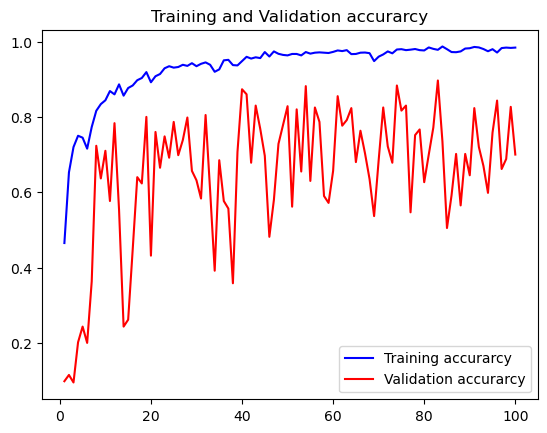

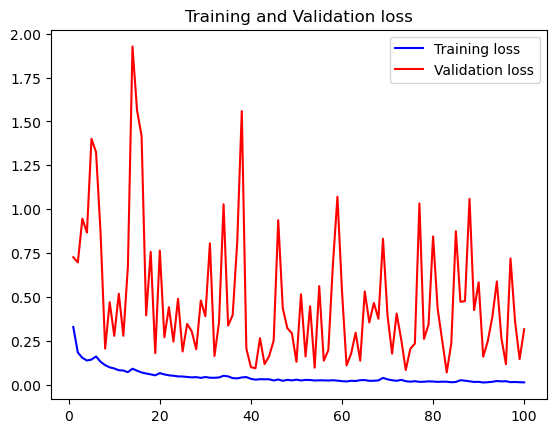

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [37]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")
print("[INFO] Saving model...")

[INFO] Calculating model accuracy
19/19 [==============================] - 2s 111ms/step - loss: 0.3156 - accuracy: 0.7000
Test Accuracy: 69.9999988079071
[INFO] Saving model...


In [38]:
model.save('tomatomodelfinal.h5')

pickle.dump(model,open('tomato_model.pkl', 'wb'))
print("[INFO] Model Saved...")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_2
.........vars
......activation_3
.........vars
......activation_4
.........vars
......activation_5
.........vars
......activation_6
.........vars
......batch_normalization
.........vars
............0
............1
............2
............3
......batch_normalization_1
.........vars
............0
............1
............2
............3
......batch_normalization_2
.........vars
............0
............1
............2
............3
......batch_normalization_3
.........vars
............0
............1
............2
............3
......batch_normalization_4
.........vars
............0
............1
............2
............3
......batch_normalization_5
.........vars
............0
............1
............2
............3
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
...........

In [39]:
model.evaluate(x_test,y_test)

19/19 [==============================] - 2s 122ms/step - loss: 0.3156 - accuracy: 0.7000


[0.3156295418739319, 0.699999988079071]

In [44]:
import pathlib
import tensorflow as tf

leaf_path = pathlib.Path('yellowcurl.jpg')

img = tf.keras.utils.load_img(
    leaf_path, target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])



print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(label_binarizer.classes_[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 18ms/step
This image most likely belongs to Tomato___Septoria_leaf_spot with a 23.20 percent confidence.
